In [2]:
!pip install locust

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.1/826.1 kB 18.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.6/103.6 kB 1.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 20.7 MB/s eta 0:00:00:00:01
  Created wheel for Flask-BasicAuth: filename=Flask_BasicAuth-0.2.0-py3-none-any.whl size=4241 sha256=bef0047d8b28c6c811efd138307ecde67b6a9170b9b90c53f5634d1b952069a2
  Stored in directory: /home/ec2-user/.cache/pip/wheels/2c/96/a5/54f6f7fa880f487e2f6c52cc9943d3299272a956cbd5af3b8c
  Created wheel for roundrobin: filename=roundrobin-0.0.4-py3-none-any.whl size=4017 sha256=c4e5365225f7010a77e77e982393f325cf54a6be76c979e4fe6df72438a04bdd
  Stored in directory: /home/ec2-user/.cache/pip/wheels/c2/e8/10/b6204cb43ae923e4f51bb5c5aee3a143ca632b3d8c0b64c078
Successfully built Fl

In [3]:
!cat run_locust.sh

#replace with your endpoint name in format https://<<endpoint-name>>
export ENDPOINT_NAME=https://$1

export REGION=eu-west-2
export CONTENT_TYPE=text/csv
# export PAYLOAD='{"inputs": "I am super happy right now."}'
export USERS=240
export WORKERS=60
export RUN_TIME=1mg
export LOCUST_UI=false # Use Locust UI


#replace with the locust script that you are testing, this is the locust_script that will be used to make the InvokeEndpoint API calls. 
export SCRIPT=locust_script.py

#make sure you are in a virtual environment
#. ./venv/bin/activate

if $LOCUST_UI ; then
    locust -f $SCRIPT -H $ENDPOINT_NAME --master --expect-workers $WORKERS -u $USERS -t $RUN_TIME --csv results_$1 &
else
    locust -f $SCRIPT -H $ENDPOINT_NAME --master --expect-workers $WORKERS -u $USERS -t $RUN_TIME --csv results_$1 --headless &
fi

for (( c=1; c<=$WORKERS; c++ ))
do 
    locust -f $SCRIPT -H $ENDPOINT_NAME --worker --master-host=localhost &
done

In [4]:
!./run_locust.sh flask-model-2023-06-23-16-49-23-549

## Doing some plotting now

In [5]:
import os
import re
import math
import json
import boto3
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from time import gmtime, strftime

In [6]:
endpoints = ["flask-model-2023-06-23-16-49-23-549", "fastapi-model-2023-06-23-16-54-20-273"]

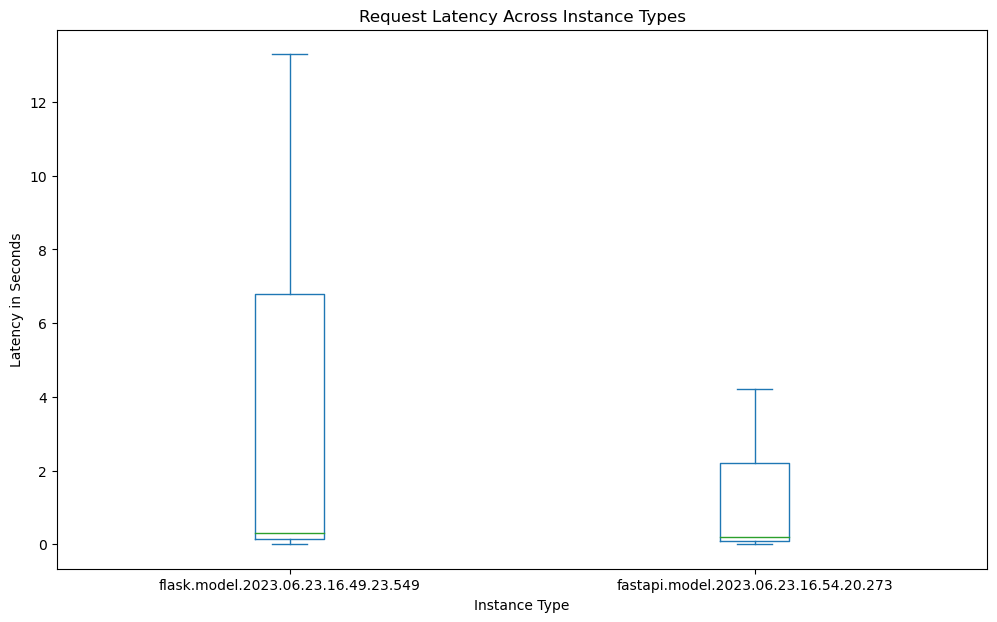

In [8]:
latency_dict= {}

# for each endpoint get latency from the load test results
for ep in endpoints:
#     prefix = f"test_{ep}"
    df = pd.read_csv(f"results_{ep}_stats.csv")

    min_latency = round(df.tail(1)['Min Response Time'].values[0] / 1000, 1)
    avg_latency = round(df.tail(1)['Average Response Time'].values[0] / 1000, 1)
    max_latency = round(df.tail(1)['Max Response Time'].values[0] / 1000, 1)

    latency_dict.update({
        ep.replace("-", "."): [min_latency,
                                                avg_latency,
                                                max_latency]
    })

# generate a data frame of the results and plot a box plot
results = pd.DataFrame(latency_dict)
res_plot = results.plot(legend=True, figsize=(12, 7), kind='box',
            title="Request Latency Across Instance Types",
            xlabel="Instance Type",
            ylabel="Latency in Seconds")

In [10]:
results

,flask.model.2023.06.23.16.49.23.549,fastapi.model.2023.06.23.16.54.20.273
0,0.0,0.0
1,0.3,0.2
2,13.3,4.2


### Now we will decrease the load by half, to 30 workers and 120 users

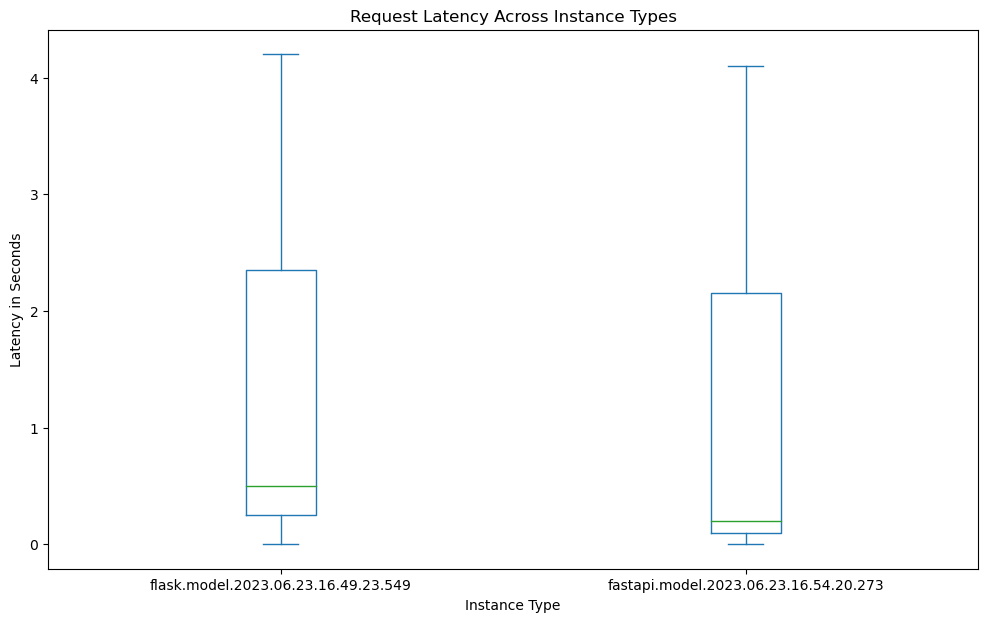

In [11]:
latency_dict= {}

# for each endpoint get latency from the load test results
for ep in endpoints:
#     prefix = f"test_{ep}"
    df = pd.read_csv(f"results_{ep}_stats.csv")

    min_latency = round(df.tail(1)['Min Response Time'].values[0] / 1000, 1)
    avg_latency = round(df.tail(1)['Average Response Time'].values[0] / 1000, 1)
    max_latency = round(df.tail(1)['Max Response Time'].values[0] / 1000, 1)

    latency_dict.update({
        ep.replace("-", "."): [min_latency,
                                                avg_latency,
                                                max_latency]
    })

# generate a data frame of the results and plot a box plot
results = pd.DataFrame(latency_dict)
res_plot = results.plot(legend=True, figsize=(12, 7), kind='box',
            title="Request Latency Across Instance Types",
            xlabel="Instance Type",
            ylabel="Latency in Seconds")

In [13]:
results

,flask.model.2023.06.23.16.49.23.549,fastapi.model.2023.06.23.16.54.20.273
0,0.0,0.0
1,0.5,0.2
2,4.2,4.1


## Run the tests one more time :):):) 

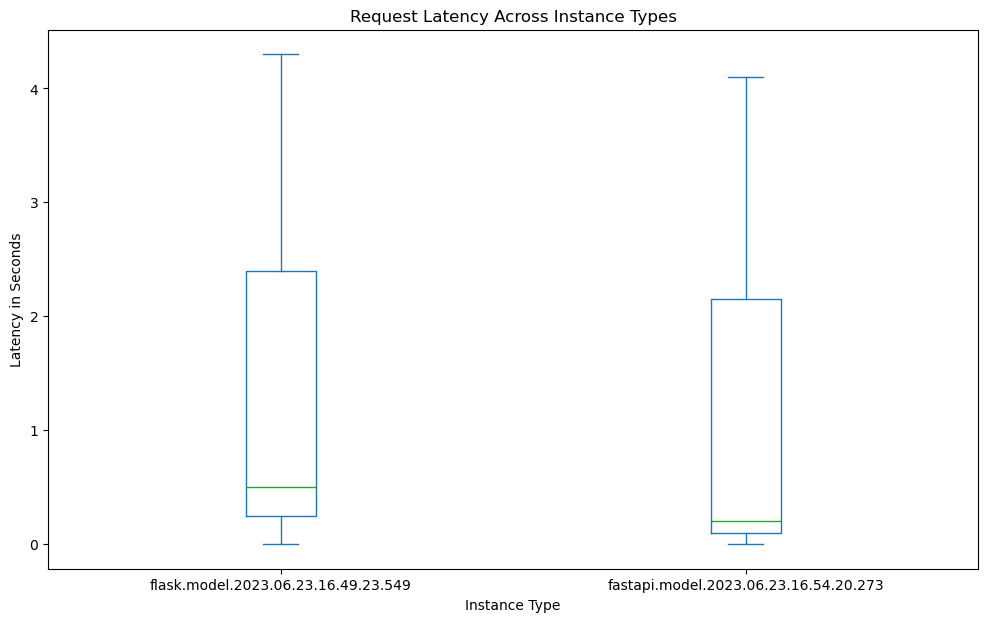

In [14]:
latency_dict= {}

# for each endpoint get latency from the load test results
for ep in endpoints:
#     prefix = f"test_{ep}"
    df = pd.read_csv(f"results_{ep}_stats.csv")

    min_latency = round(df.tail(1)['Min Response Time'].values[0] / 1000, 1)
    avg_latency = round(df.tail(1)['Average Response Time'].values[0] / 1000, 1)
    max_latency = round(df.tail(1)['Max Response Time'].values[0] / 1000, 1)

    latency_dict.update({
        ep.replace("-", "."): [min_latency,
                                                avg_latency,
                                                max_latency]
    })

# generate a data frame of the results and plot a box plot
results = pd.DataFrame(latency_dict)
res_plot = results.plot(legend=True, figsize=(12, 7), kind='box',
            title="Request Latency Across Instance Types",
            xlabel="Instance Type",
            ylabel="Latency in Seconds")

In [15]:
results

,flask.model.2023.06.23.16.49.23.549,fastapi.model.2023.06.23.16.54.20.273
0,0.0,0.0
1,0.5,0.2
2,4.3,4.1
